## Import Libs

In [1]:
import random
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## store pictures and labels

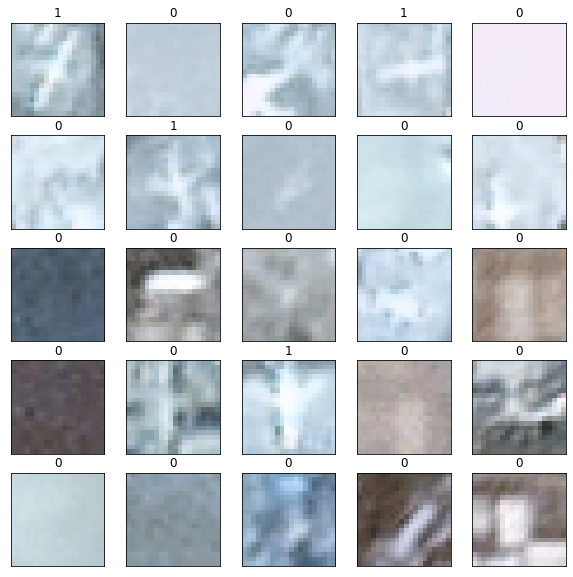

In [2]:
pictures = []
labels = []
planesnet_dir = ('planesnet')

files = glob.glob (planesnet_dir + "/*.png") # image path
# shuffle
random.Random(42).shuffle(files)

for picture in files:
    image = cv2.imread (picture)
    im_name = picture.replace(planesnet_dir + "\\","")
    labels.append(im_name[0])
    pictures.append(image)

# plot pictures and the corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pictures[i])
    plt.title(labels[i])
plt.show()

## split dataset into train, test and validation

In [3]:
develop = False
# 32,000 instances - 20,480 Train, 5,120 Val, 6400 Test

if develop:
    X_train = np.array(pictures[0:5000]).astype('float32')
    y_train = np.array(labels[0:5000])
    X_val = np.array(pictures[5000:6000]).astype('float32')
    y_val = np.array(labels[5000:6000])
    X_test = np.array(pictures[6000:7000]).astype('float32')
    y_test = np.array(labels[6000:7000])
else:
    X_train = np.array(pictures[0:20480]).astype('float32')
    y_train = np.array(labels[0:20480])
    X_val = np.array(pictures[20480:25600]).astype('float32')
    y_val = np.array(labels[20480:25600])
    X_test = np.array(pictures[25600:]).astype('float32')
    y_test = np.array(labels[25600:])

## data preparation

In [4]:
# normalize pixel values
X_train /= 255
X_val /= 255
X_test /= 255

# one hot encoding of labels for categorical_crossentropy
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## build, compile and fit model

In [5]:
# hyperparameter
epochs = 50
batch_size = 128


model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(20,20,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Train on 20480 samples, validate on 5120 samples
Epoch 1/50
20480/20480 [==============================] - 8s 367us/sample - loss: 0.4405 - accuracy: 0.8008 - val_loss: 0.2536 - val_accuracy: 0.8883
Epoch 2/50
20480/20480 [==============================] - 3s 147us/sample - loss: 0.2172 - accuracy: 0.9169 - val_loss: 0.1593 - val_accuracy: 0.9311
Epoch 3/50
20480/20480 [==============================] - 3s 143us/sample - loss: 0.1836 - accuracy: 0.9332 - val_loss: 0.1201 - val_accuracy: 0.9537
Epoch 4/50
20480/20480 [==============================] - 3s 144us/sample - loss: 0.1646 - accuracy: 0.9389 - val_loss: 0.1187 - val_accuracy: 0.9594
Epoch 5/50
20480/20480 [==============================] - 3s 145us/sample - loss: 0.1557 - accuracy: 0.9414 - val_loss: 0.0972 - val_accuracy: 0.9631
Epoch 6/50
20480/20480 [==============================] - 3s 144us/sample - loss: 0.1334 - accuracy: 0.9518 - val_loss: 0.0943 - val_accuracy: 0.9645
Epoch 7/50
20480/20480 [===========================

## Plot Training and Validation Accuracy and Loss

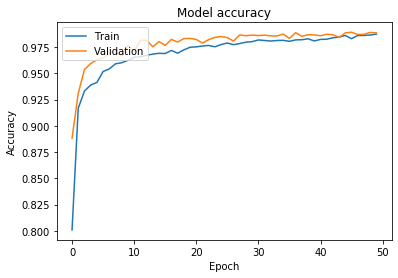

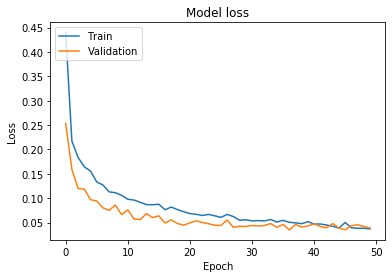

In [8]:
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluate Model

In [9]:
y_pred_val = model.predict(X_val)
y_pred_val = np.argmax(y_pred_val, axis=1)
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
y_val = np.argmax(y_val, axis=1)
y_test = np.argmax(y_test, axis=1)
print(" ### Validation Set ### ")
print("confusion matrix:")
print(confusion_matrix(y_val, y_pred_val))
print("")
print("Accuracy: ", accuracy_score(y_val, y_pred_val))
print('\n')
print(classification_report(y_val, y_pred_val, target_names=["no plane","plane"]))


print("### Test Set ### ")
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print('\n')
print(classification_report(y_test, y_pred_test, target_names=["no plane","plane"]))

 ### Validation Set ### 
confusion matrix:
[[3841   24]
 [  34 1221]]

Accuracy:  0.988671875


              precision    recall  f1-score   support

    no plane       0.99      0.99      0.99      3865
       plane       0.98      0.97      0.98      1255

    accuracy                           0.99      5120
   macro avg       0.99      0.98      0.98      5120
weighted avg       0.99      0.99      0.99      5120

### Test Set ### 
confusion matrix:
[[4752   50]
 [  44 1554]]

Accuracy:  0.9853125


              precision    recall  f1-score   support

    no plane       0.99      0.99      0.99      4802
       plane       0.97      0.97      0.97      1598

    accuracy                           0.99      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.99      0.99      0.99      6400

